In [2]:
import scanpy as sc

In [13]:
data = sc.read_10x_h5('data/e18_mouse_brain_fresh_5k_filtered_feature_bc_matrix.h5', gex_only=False)

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [14]:
RNA_data = data[:, data.var['feature_types'] == 'Gene Expression'].copy()
ATAC_data = data[:, data.var['feature_types'] == 'Peaks'].copy()

/opt/conda/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:
RNA_data.layers["counts"] = RNA_data.X.copy()
ATAC_data.layers["counts"] = ATAC_data.X.copy()

sc.pp.normalize_total(RNA_data, target_sum=1e6)
sc.pp.log1p(RNA_data)
sc.pp.highly_variable_genes(RNA_data, n_top_genes=3000)
sc.pp.pca(RNA_data, n_comps=50)
sc.pp.neighbors(RNA_data, n_neighbors=15, use_rep='X_pca')

In [ ]:
sc.tl.umap(RNA_data)
sc.tl.leiden(RNA_data, flavor="igraph", n_iterations=2, resolution=0.5)

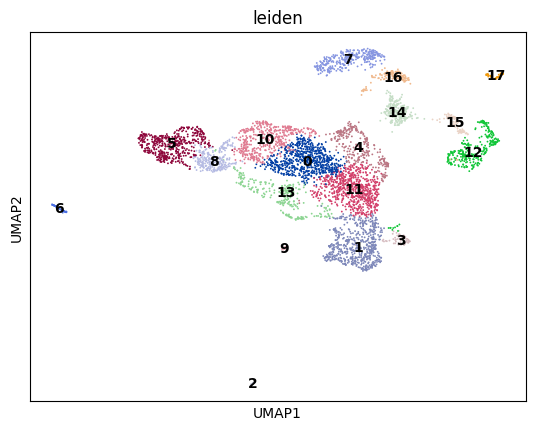

In [45]:
sc.pl.umap(RNA_data, color=["leiden"], size=7, legend_loc="on data")